In [93]:
# Dependencies
from census import Census
import pandas as pd
import matplotlib.pyplot as plt
# Census API Key
census_api_key = "85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98"

In [11]:
for year in range(2009,2020):
    c = Census(census_api_key, year=year)
    try:
        census_data = c.acs5.get(("NAME", "B16001_002E", "B16001_003E", "B16001_009E",
                              "B16001_021E","B16001_009E","B16001_012E",
                              "B16001_015E",
                                      "B16001_018E","B16001_030E","B16001_033E","B16001_036E","B16001_039E",
                                      "B16001_045E",
                                      "B16001_048E",
                                      "B16001_051E",
                                      "B16001_054E",
                                      "B16001_057E",
                                      "B16001_066E",
                                      "B16001_069E",
                                      "B16001_072E",
                                      "B16001_075E",
                                      "B16001_078E",
                                      "B16001_081E",
                                      "B16001_084E",
                                      "B16001_087E",
                                      "B16001_093E",
                                      "B16001_099E",
                                      "B16001_105E",
                                      "B16001_108E",
                                      "B16001_111E"
                         
                                 ), {'for': 'state:*'})
    except:
        print("Something went wrong in year", year)  # this happened for 2019, don't know what the error is
    census_pd = pd.DataFrame(census_data)
    census_pd = census_pd.rename(columns={"B16001_002E":"English only", 
                                      "B16001_003E":"Spanish", 
                                      "B16001_009E":"French",
                                      "B16001_021E":"Yiddish",
                                      "B16001_009E": "French Creole",
                                      "B16001_012E": "Italian",
                                      "B16001_015E": "Portuguese",
                                      "B16001_018E": "German",
                                      "B16001_030E": "Greek",
                                      "B16001_033E": "Russian",
                                      "B16001_036E": "Polish",
                                      "B16001_039E": "Serbo-Croatian",
                                      "B16001_045E": "Armenian",
                                      "B16001_048E": "Persian",
                                      "B16001_051E": "Gujarati",
                                      "B16001_054E": "Hindi",
                                      "B16001_057E": "Urdu",
                                      "B16001_066E": "Chinese",
                                      "B16001_069E": "Japanese",
                                      "B16001_072E": "Korean",
                                      "B16001_075E": "Mon-Khmer",
                                      "B16001_078E": "Hmong",
                                      "B16001_081E": "Thai",
                                      "B16001_084E": "Laotian",
                                      "B16001_087E": "Vietnamese",
                                      "B16001_093E": "Tagalog",
                                      "B16001_099E": "Navajo",
                                      "B16001_105E": "Hungarian",
                                      "B16001_108E": "Arabic",
                                      "B16001_111E": "Hebrew",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
    census_pd.to_csv(str(year)+".csv", index = False, header = True)

Something went wrong in year 2019


In [61]:
all_dfs = {}
for year in range(2009,2020):
    all_dfs[year] = pd.read_csv(str(year)+".csv")

In [53]:
def addSum(df):
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    return df

In [76]:
all_summed = {}

for year,df in all_dfs.items():
    all_summed[year] = addSum(df)

In [77]:
year_sums = {}

for year in range(2009,2020):
    year_sums[year] = all_summed[year].iloc[-1,1:-1]

In [90]:
sums_by_year = pd.DataFrame([year_sums[y] for y in range(2009,2020)]).T
sums_by_year.columns = [y for y in range(2009,2020)]

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
English only,225882277.0,226897366.0,228376880.0,229781216.0,231294617.0,232900575.0,234352363.0,235703822.0,237113846.0,238129421.0,238129421.0
Spanish,37574942.0,38833955.0,39519093.0,40160868.0,40750580.0,41351012.0,41895668.0,42300587.0,42876359.0,43307602.0,43307602.0
French Creole,612910.0,656051.0,688785.0,713701.0,739768.0,765985.0,786770.0,806268.0,824898.0,834558.0,834558.0
Yiddish,159410.0,154342.0,154977.0,156136.0,155582.0,157943.0,159695.0,478524.0,484122.0,493222.0,493222.0
Italian,804455.0,765684.0,747740.0,733340.0,709354.0,689586.0,663629.0,635866.0,610988.0,591543.0,591543.0
Portuguese,693090.0,681009.0,682846.0,686676.0,693975.0,687312.0,687642.0,700052.0,720651.0,747723.0,747723.0
German,1130410.0,1109732.0,1102869.0,1097187.0,1064162.0,1029625.0,999350.0,964879.0,936435.0,914147.0,914147.0
Greek,331686.0,319353.0,311150.0,308929.0,304987.0,298631.0,296719.0,540858.0,534719.0,525456.0,525456.0
Russian,848181.0,830524.0,851430.0,865782.0,879505.0,889711.0,900904.0,251852.0,246483.0,246233.0,246233.0
Polish,619652.0,604434.0,598205.0,587857.0,580196.0,574006.0,560528.0,320602.0,323804.0,328420.0,328420.0


In [100]:
sums_by_year.index[0]

'English only'

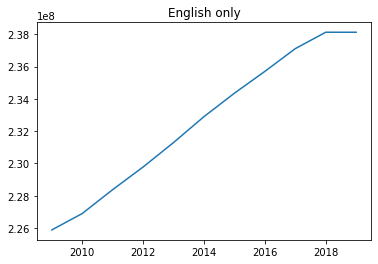

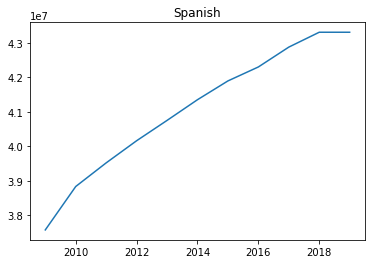

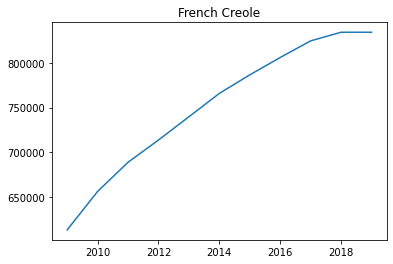

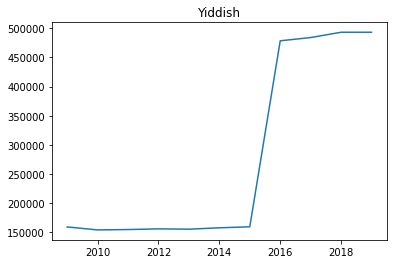

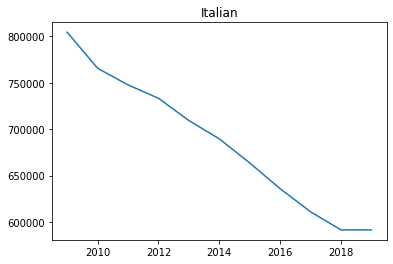

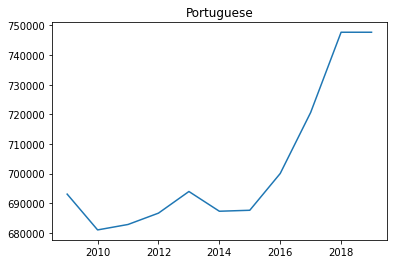

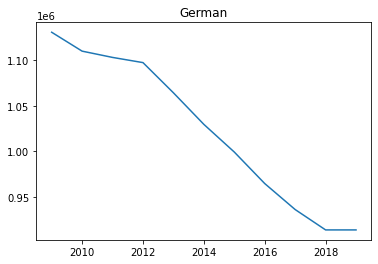

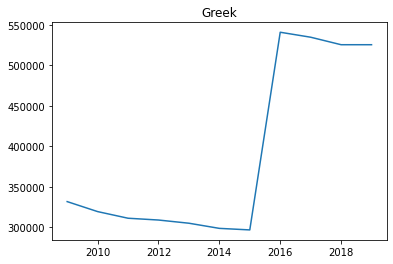

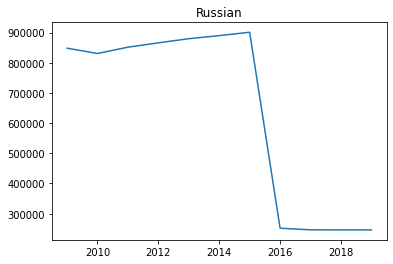

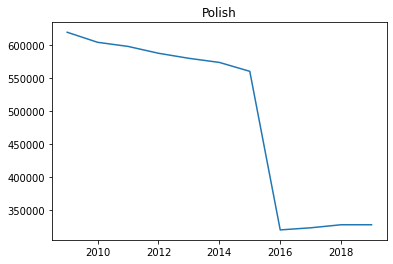

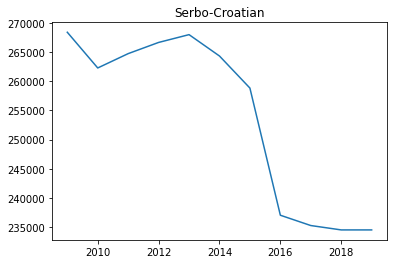

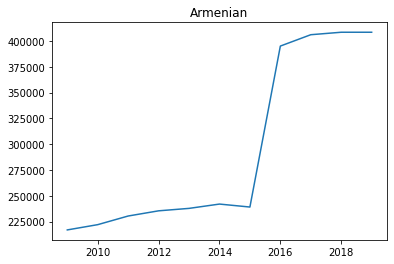

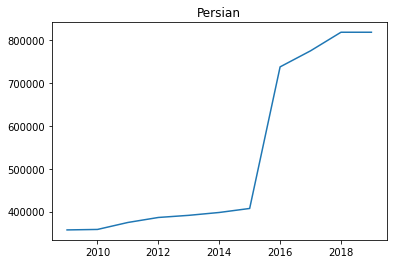

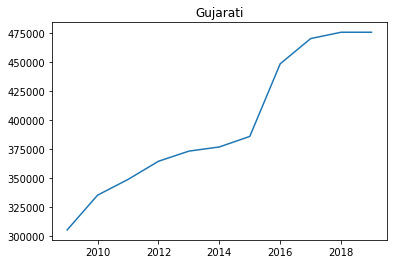

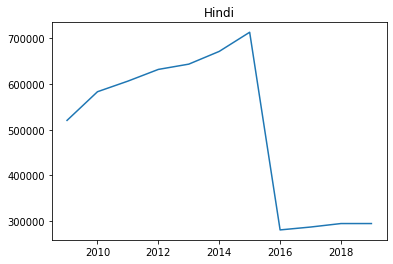

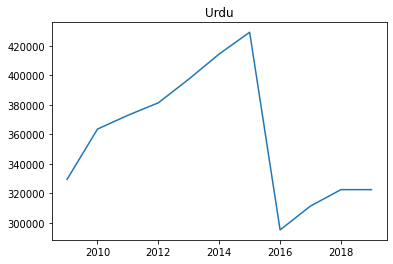

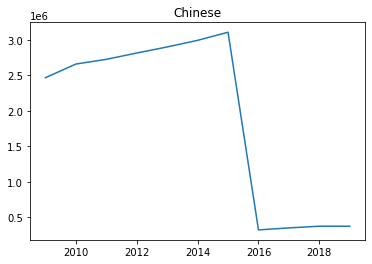

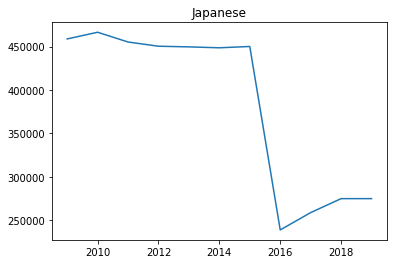

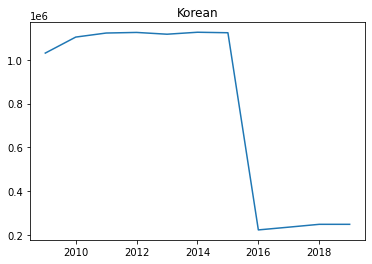

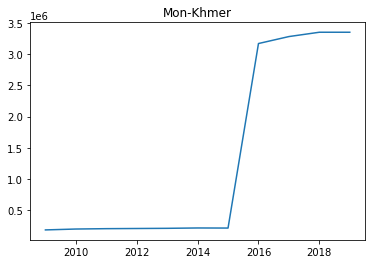

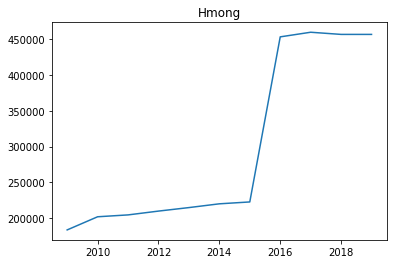

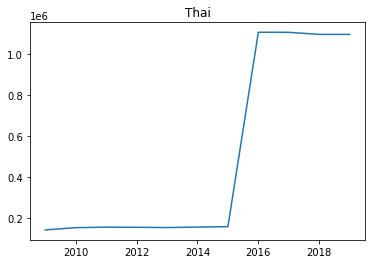

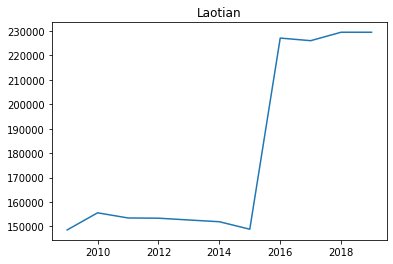

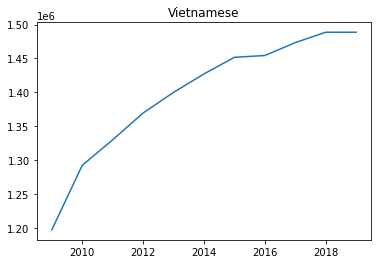

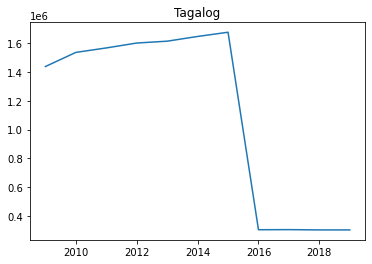

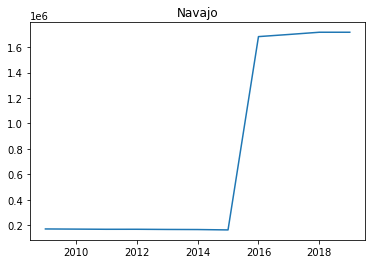

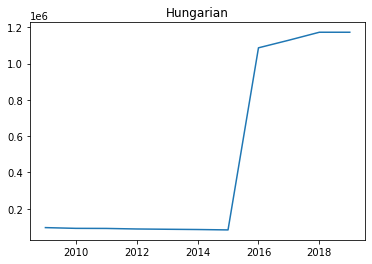

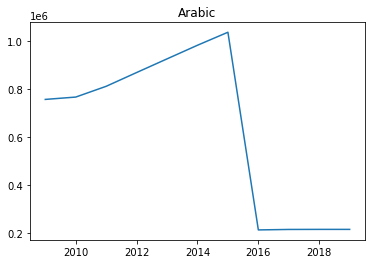

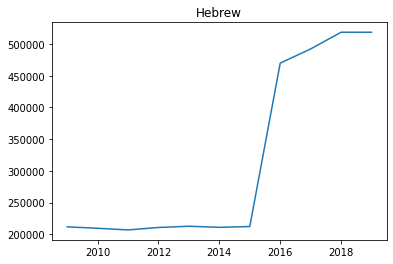

In [101]:
for lang in range(len(sums_by_year)):
    
    plt.plot(sums_by_year.iloc[lang,:])
    name = sums_by_year.index[lang]
    plt.title(name)
    plt.show()

# most of these graphs look really weird! steep changes between 2015-2016
# I'm thinking there's something wrong with the data